# Regression with Linear Algebra

In [1]:
import csv  # for reading csv file
import numpy as np

## Dataset 

The dataset you'll use for this experiment is "**Sales Prices in the City of Windsor, Canada**". This dataset contains a number of input (independent) variables, including area, number of bedrooms/bathrooms, facilities(AC/garage), etc. and an output (dependent) variable, **price**.  You'll formulate a linear algebra problem to find linear mappings from input features using the equation provided in the previous lesson. 

This will allow you to find a relationship between house features and house price for the given data, allowing you to find unknown prices for houses, given the input features.  

A description of the dataset and included features is available [here](https://rdrr.io/cran/Ecdat/man/Housing.html).

In your repository, the dataset is available as `windsor_housing.csv`. There are 11 input features (first 11 columns):

	lotsize	bedrooms  bathrms  stories	driveway  recroom	fullbase  gashw	 airco  garagepl   prefarea

and 1 output feature i.e. **price** (12th column). 

The focus of this lab is not really answering a preset analytical question, but to learn how you can perform a regression experiment, using mathematical manipulations - similar to the one you performed using `statsmodels`. So you won't be using any `pandas` or `statsmodels` goodness here. The key objectives here are to: 

- Understand regression with matrix algebra and 
- Mastery in NumPy scientific computation

## Stage 1: Prepare data for modeling 

Let's give you a head start by importing the dataset. You'll perform the following steps to get the data ready for analysis:

* Initialize an empty list `data` for loading data
* Read the csv file containing complete (raw) `windsor_housing.csv`. [Use `csv.reader()` for loading data.](https://docs.python.org/3/library/csv.html). Store this in `data` one row at a time 

* Drop the first row of csv file as it contains the names of variables (header) which won't be used during analysis (keeping this will cause errors as it contains text values) 

* Append a column of all **1**s to the data (bias) as the first column

* Convert `data` to a NumPy array and inspect first few rows 

> NOTE: `read.csv()` reads the csv as a text file, so you should convert the contents to float.

In [5]:
data = [] # empty list

with open("windsor_housing.csv") as f:
    raw = csv.reader(f)
    
    next(raw) # drop line 1
    
    for row in raw:
        ones = [1.0]
        for r in row:
            ones.append(float(r))
            
        data.append(ones)
        
data = np.array(data)
data[:5, :]

array([[1.00e+00, 5.85e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        4.20e+04],
       [1.00e+00, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        3.85e+04],
       [1.00e+00, 3.06e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        4.95e+04],
       [1.00e+00, 6.65e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        6.05e+04],
       [1.00e+00, 6.36e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        6.10e+04]])

## Step 2: Perform a 80/20 train-test split

Explore NumPy's official documentation to manually split a dataset using a random sampling method of your choice. Some useful methods are located in the [numpy.random library](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html).
* Perform a **random** 80/20 split on data using a method of your choice in NumPy
* Split the data to create `x_train`, `y_train`, `x_test`, and `y_test` arrays 
* Inspect the contents to see if the split performed as expected

> Note: When randomly splitting data, it's always recommended to set a seed in order to ensure reproducibility 

In [9]:
np.random.seed(0)

all = np.arange(data.shape[0])
training = np.random.choice(all, size=round(546 * 0.8), replace=False)
test = all[~np.isin(all, training)]

training, test = data[training, :], data[test, :]

print("Raw data shape: ", data.shape)
print("Train/Test Split: ", training.shape, test.shape)

x_train = training[:, :-1]
y_train = training[:, -1]

x_test = test[:, :-1]
y_test = test[:, -1]

print("x_train, y_train, x_test, y_test:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Raw data shape:  (546, 13)
Train/Test Split:  (437, 13) (109, 13)
x_train, y_train, x_test, y_test: (437, 12) (437,) (109, 12) (109,)


## Step 3: Calculate the `beta` 

With $X$ and $y$ in place, you can now compute your beta values with $x_\text{train}$ and $y_\text{train}$ as:
#### $\beta = (x_\text{train}^T. x_\text{train})^{-1} . x_\text{train}^T . y_\text{train}$

* Using NumPy operations (transpose, inverse) that we saw earlier, compute the above equation in steps 
* Print your beta values 

In [10]:
Xt = np.transpose(x_train)
XtX = np.dot(Xt, x_train)
Xty = np.dot(Xt, y_train)

XtX_inv = np.linalg.inv(XtX)

beta = XtX_inv.dot(Xty)

beta

array([-4.78423126e+03,  3.57907256e+00,  1.90670190e+03,  1.54061456e+04,
        6.47155207e+03,  6.00186823e+03,  4.30165980e+03,  5.82313191e+03,
        1.48645423e+04,  1.03323401e+04,  4.73114062e+03,  1.03615871e+04])

## Step 4: Make predictions
Great, you now have a set of coefficients that describe the linear mappings between $X$ and $y$. You can now use the calculated beta values with the test datasets that we left out to calculate $y$ predictions. Next, use all features in turn and multiply it with this beta. The result will give a prediction for each row which you can append to a new array of predictions.

$\hat{y} = x\beta = \beta_0 + \beta_1 x_1 +  \beta_2 x_2 + \ldots + \beta_m x_m $ 

* Create a new empty list (`y_pred`) for saving predictions
* For each row of `x_test`, take the dot product of the row with beta to calculate the prediction for that row
* Append the predictions to `y_pred`
* Print the new set of predictions

In [13]:
# Your code here
y_pred = []

for row in x_test:
    pred = row.dot(beta)
    y_pred.append(pred)
    
print(y_pred)

[66778.8394052914, 102686.28171843954, 40988.80987906334, 43883.12987759504, 69515.06960292139, 58531.73160464071, 110083.41117381175, 40344.45838119798, 55415.578045109956, 75165.26035965991, 94523.8662570478, 64398.5581036759, 51027.3218003996, 33301.1793199034, 48350.60724645232, 57033.9764763804, 75952.7962709694, 78268.77228344785, 82815.24686173767, 51246.43183906098, 43737.152182785416, 37055.40913445852, 43372.472204729216, 65070.262671349825, 88769.52494082147, 94911.24239037964, 101983.5978512305, 92201.98127306036, 49066.42175866429, 37012.69671756243, 92866.19948216464, 92843.44811139608, 40022.34185070259, 52332.58966331378, 46203.381011813086, 51976.18859896605, 90458.0212809691, 71536.86995968779, 41421.72080656985, 47849.53708790393, 48378.13920275043, 46471.437299514146, 64449.77271752317, 71938.99695719418, 63981.29062391845, 48300.83596946875, 53593.49767483961, 55319.04237099599, 99075.10859596022, 78573.23912004898, 39936.56254611173, 39936.56254611173, 39793.39964

## Step 5: Evaluate model 

### Visualize actual vs. predicted values
This is exciting, now your model can use the beta value to predict the price of houses given the input features. Let's plot these predictions against the actual values in `y_test` to see how much our model deviates. 

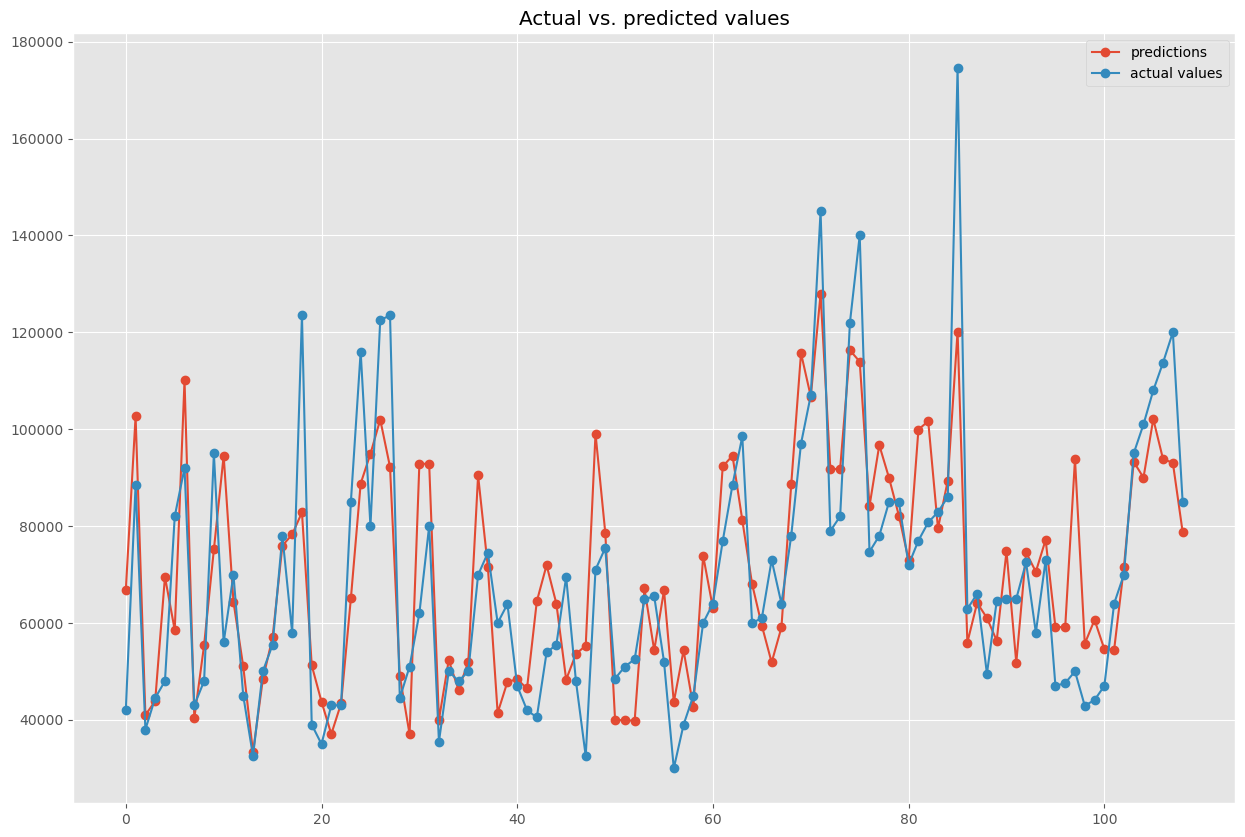

In [14]:
# Plot predicted and actual values as line plots

import matplotlib.pyplot as plt

from pylab import rcParams

rcParams["figure.figsize"] = 15, 10
plt.style.use("ggplot")

plt.plot(y_pred, linestyle="-", marker="o", label="predictions")
plt.plot(y_test, linestyle="-", marker="o", label="actual values")
plt.title("Actual vs. predicted values")
plt.legend();

This doesn't look so bad, does it? Your model, although isn't perfect at this stage, is making a good attempt to predict house prices although a few prediction seem a bit out. There could be a number of reasons for this. Let's try to dig a bit deeper to check model's predictive abilities by comparing these prediction with actual values of `y_test` individually. That will help you calculate the RMSE value (root mean squared error) for your model. 

### Root Mean Squared Error
Here is the formula for RMSE:  

$$ \large RMSE = \sqrt{\sum^N_{i=1}\dfrac{ (\text{Predicted}_i-\text{Actual}_i)^2}{N}}$$

* Initialize an empty array `err`
* For each row in `y_test` and `y_pred`, take the squared difference and append error for each row in the `err` array
* Calculate $RMSE$ from `err` using the formula shown above 

In [15]:
err = []
for pred, actual in zip(y_pred, y_test):
    sq_err = (pred - actual) ** 2
    err.append(sq_err)
MSE = np.array(err).mean()
RMSE = np.sqrt(MSE)
RMSE

15984.67199389172

### Normalized root mean squared error
The above error is clearly in terms of the dependent variable, i.e., the final house price. You can also use a normalized mean squared error in case of multiple regression which can be calculated from RMSE using following the formula:

$$ \large NRMSE = \dfrac{RMSE}{max_i y_i - min_i y_i} $$

* Calculate normalized RMSE

In [18]:
NRMSE = RMSE/ (y_train.max() - y_train.min())
NRMSE

0.09687679996298011